In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Wine_clust.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#modules loaded in your computer memory
%whos 

Variable   Type         Data/Info
---------------------------------
data       DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [5]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [24]:

#preparation of data
#x = data.iloc[:,:].values
x = data.iloc[:, [0,12]].values
x
x

array([[  14.23, 1065.  ],
       [  13.2 , 1050.  ],
       [  13.16, 1185.  ],
       [  14.37, 1480.  ],
       [  13.24,  735.  ],
       [  14.2 , 1450.  ],
       [  14.39, 1290.  ],
       [  14.06, 1295.  ],
       [  14.83, 1045.  ],
       [  13.86, 1045.  ],
       [  14.1 , 1510.  ],
       [  14.12, 1280.  ],
       [  13.75, 1320.  ],
       [  14.75, 1150.  ],
       [  14.38, 1547.  ],
       [  13.63, 1310.  ],
       [  14.3 , 1280.  ],
       [  13.83, 1130.  ],
       [  14.19, 1680.  ],
       [  13.64,  845.  ],
       [  14.06,  780.  ],
       [  12.93,  770.  ],
       [  13.71, 1035.  ],
       [  12.85, 1015.  ],
       [  13.5 ,  845.  ],
       [  13.05,  830.  ],
       [  13.39, 1195.  ],
       [  13.3 , 1285.  ],
       [  13.87,  915.  ],
       [  14.02, 1035.  ],
       [  13.73, 1285.  ],
       [  13.58, 1515.  ],
       [  13.68,  990.  ],
       [  13.76, 1235.  ],
       [  13.51, 1095.  ],
       [  13.48,  920.  ],
       [  13.28,  880.  ],
 

# kmeans clustering

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

17552625.625942133
4507966.185337798
2337923.9471920775
1298952.7127767839
886734.5981977142
617685.2945177195
381436.5002096008
292903.7569162238
241360.24770452463
190218.79796705063
158339.13574663305
129585.98806046294


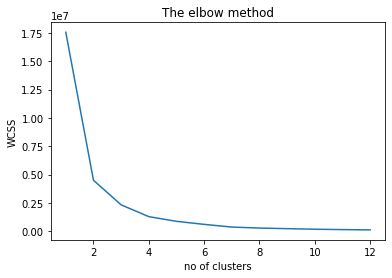

In [26]:
plt.plot(range(1,13),wcss)
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

<h2> according to the elbow method we can say the optimal number of cluster is 3

In [27]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x)
type(x )



numpy.ndarray

In [28]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

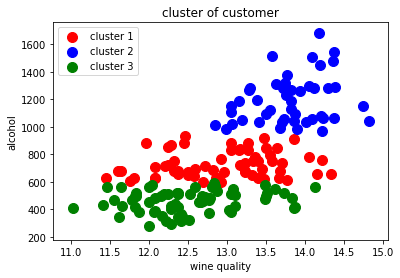

In [29]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'cluster 3')


plt.title('cluster of customer')
plt.xlabel('wine quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

# Hierarchial clustering

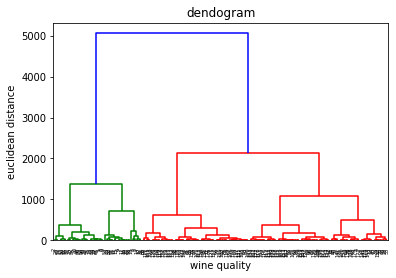

In [30]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x, method = "ward"))
plt.title('dendogram')
plt.xlabel('wine quality')
plt.ylabel('euclidean distance')
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(x)

In [32]:
y_hc

array([3, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 1, 1,
       3, 3, 1, 1, 3, 0, 1, 3, 0, 0, 3, 0, 3, 1, 1, 3, 3, 1, 1, 3, 3, 4,
       1, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 1, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 4, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 2, 2, 2, 1, 4, 2, 4, 2, 1, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 1, 2, 4, 4, 4, 1, 2, 4, 1, 1, 2, 4, 4, 4, 2, 2, 2, 4,
       4, 1, 2, 1, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 1, 4, 2, 2, 4, 1, 1, 1,
       1, 4], dtype=int64)

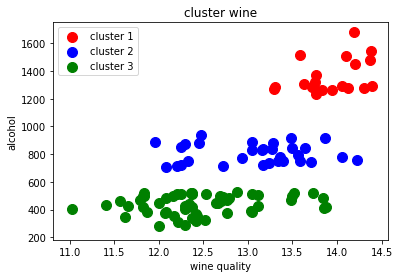

In [34]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2,1], s = 100, c = 'green', label = 'cluster 3')


plt.title('cluster wine')
plt.xlabel('wine quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()